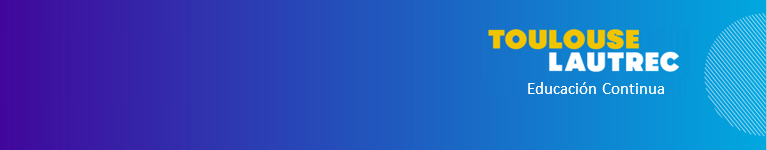

#**APRENDIZAJE AUTOMÁTICO: CLUSTERING**



----------------------------
**SESIÓN N°3:** Técnicas de Clustering

Docente: Luis Bautista



<a id = "2"></a><br>
## Cargando las Libraria

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import unique

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

## Información de la data

Este conjunto de datos está compuesto por las siguientes cinco características:

- CustomerID: ID único asignado al cliente

- Gender: Género del cliente

- Age: Edad del cliente

- Annual Income (k$): Ingreso Anual del cliente

- Spending Score (1-100): puntuación asignada por el centro comercial según el comportamiento del cliente y la naturaleza del gasto.

<a id = "3"></a><br>
## Load Dataset

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.shape

(200, 5)

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


En la estadística descriptica podemos ver que la edad minima que un cliente tiene es de 18 años y la máxima es de 70 años. por otro lado el ingreso mínimo de un cliente es 15K y el máximo es de 137k dólares.

In [6]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Nuestro conjunto de dato no tiene valores nulos. Esto simplifica nuestro análisis y la manipulación de nuestro datos también, aunque es un escenario poco improbable en la vida real donde analizamos, donde pasamos una cantidad de tiempo limpiando nuestro datos antes de analizar su análisis.

<a id = "4"></a><br>
## **1 - K-Means**

## Método del codo

El `KElbowVisualizer` implementa el método "codo" para ayudar a los científicos de datos a seleccionar la cantidad óptima de clústeres ajustando el modelo con un rango de valores para $K$. Si el gráfico de líneas se parece a un brazo, entonces el "codo" (el punto de inflexión en el curva) es una buena indicación de que el modelo subyacente se ajusta mejor en ese punto. En el visualizador, el "codo" se anotará con una línea discontinua.

Para demostrarlo, en el siguiente ejemplo, `KElbowVisualizer` ajusta(`fit`) el modelo `KMeans()` para un rango de valores $K$ de 1 a 12 en un conjunto de datos bidimensional de muestra con 8 grupos de puntos aleatorios. Cuando el modelo se ajusta con 8 clústeres, podemos ver una línea que anota el "codo" en el gráfico, que en este caso sabemos que es el número óptimo.

In [7]:
data.drop(['CustomerID'], axis=1, inplace=True)
data.drop(['Gender'], axis=1, inplace=True)
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# Elección del mejor valor de **K**

### Usando la suma de las distancias al cuadrado

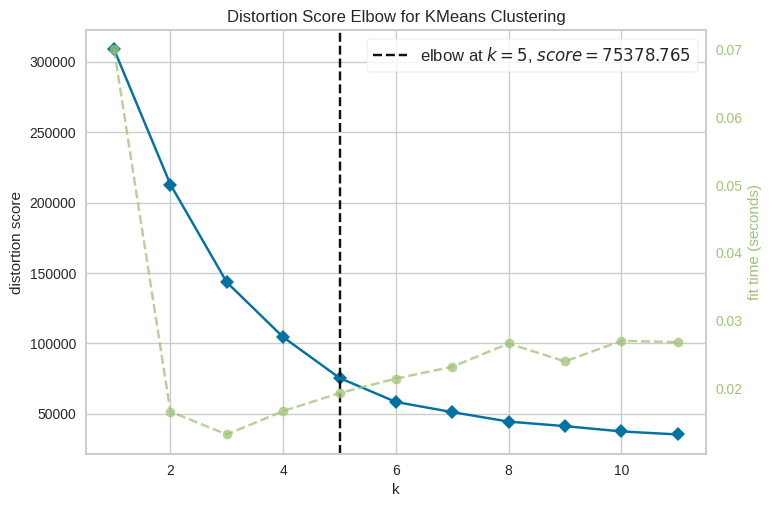

In [8]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Creando el modelo de agrupamiento
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(data)        # Ajustar los datos a la visualizador
visualizer.show();

De forma predeterminada, la métrica del parámetro de puntuación se establece en distorsión, que calcula la suma de las distancias al cuadrado desde cada punto hasta su centro asignado. Sin embargo, también se pueden usar otras dos métricas con KElbowVisualizer: `silhouette` y `calinski_harabasz`. La puntuación de silueta calcula el coeficiente de silueta medio de todas las muestras, mientras que la puntuación de calinski_harabasz calcula la relación de dispersión entre y dentro de los grupos.

El `KElbowVisualizer` también muestra la cantidad de tiempo para entrenar el modelo de agrupación por K como una línea verde discontinua, pero se puede ocultar configurando `timings=False`. En el siguiente ejemplo, usaremos la puntuación `calinski_harabasz` y ocultaremos el tiempo para ajustar el modelo.

### Usando la metrica **'silhouette'**

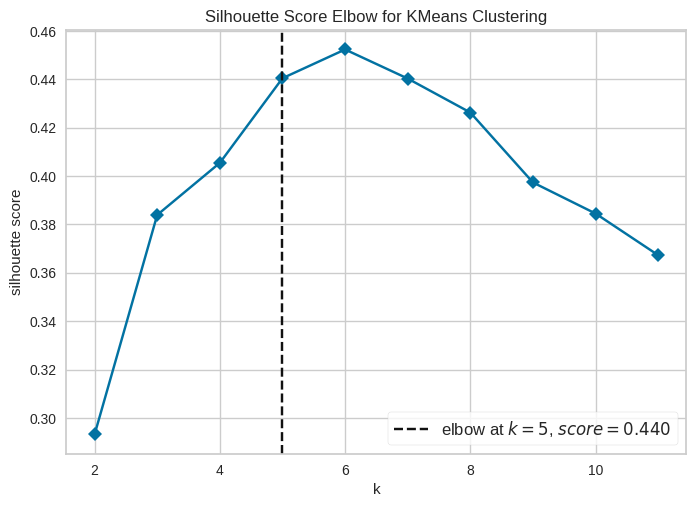

In [9]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)
visualizer.fit(data)         # Ajustar los datos a la visualizador
visualizer.show();

De forma predeterminada, el parámetro `locate_elbow` se establece en Verdadero, que encuentra automáticamente el "codo" que probablemente corresponde al valor óptimo de k utilizando el "algoritmo de detección del punto de inflexión". Sin embargo, los usuarios pueden desactivar la función configurando `locate_elbow=False`.

## Implementando el Algoritmo K-Means (k=5)

In [11]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(data) # Inicializamos y entrenamos K-Means model
KM5_clustered = data.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # Agregar etiquetas

In [12]:
KM5_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,3
2,20,16,6,2
3,23,16,77,3
4,31,17,40,2
...,...,...,...,...
195,35,120,79,1
196,45,126,28,0
197,32,126,74,1
198,32,137,18,0


## Visualizando los clusters

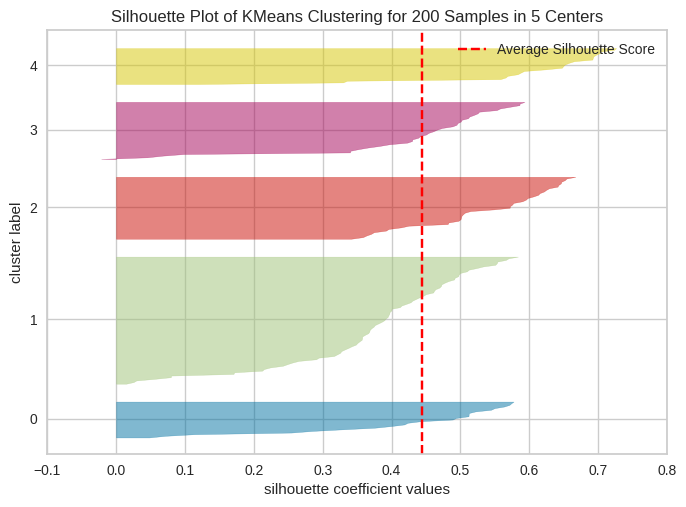

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show();

<a id = "8"></a><br>
# **2 - PAM**

In [22]:
!pip install scikit-learn-extra # Install the correct library for KMedoids

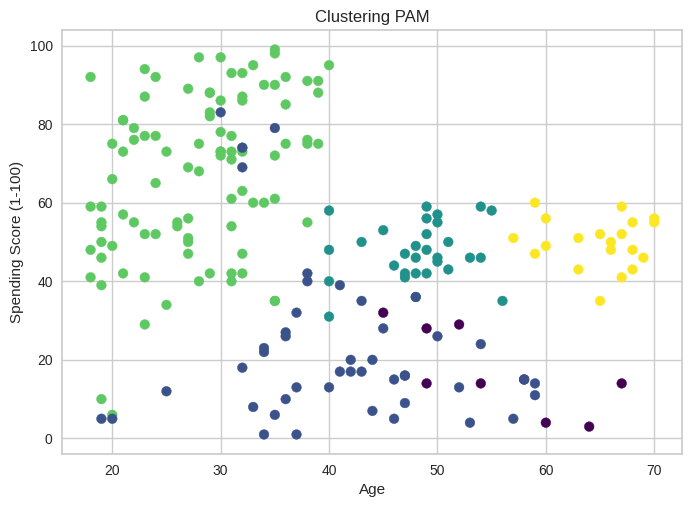

In [27]:
import pandas as pd
from sklearn_extra.cluster import KMedoids # Import KMedoids from the correct library
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Escalar los datos (opcional, pero recomendado para PAM)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Crear el modelo PAM y ajustarlo a los datos
k = 5  # Número de clusters
pam = KMedoids(n_clusters=k, random_state=0).fit(scaled_data)

# Agregar los labels de los clusters al DataFrame original
data['cluster_PAM'] = pam.labels_

# Visualizar los clusters
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['cluster_PAM'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering PAM')
plt.show()

<a id = "9"></a><br>
# **3 - AGNES**

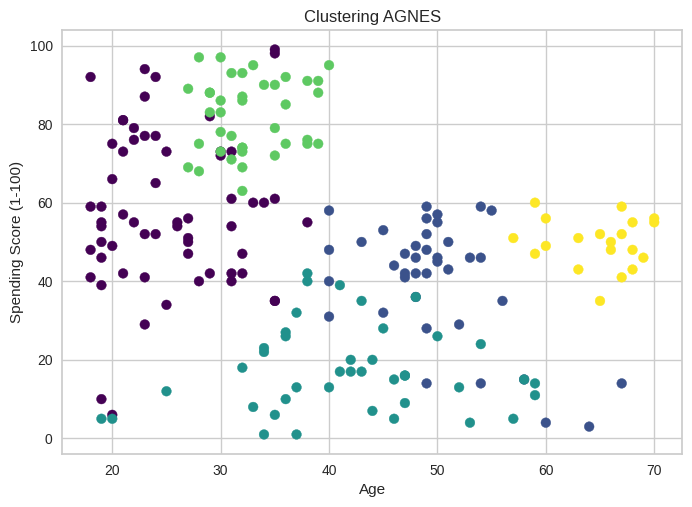

In [28]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Escalar los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define the number of clusters
n_clusters = 5

# Create the AGNES model and fit it to the data
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
model.fit(scaled_data)

# Add cluster labels to the DataFrame
data['cluster_AGNES'] = model.labels_

# Visualize the clusters
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['cluster_AGNES'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering AGNES')
plt.show()

<a id = "10"></a><br>
# **4 - CLARA**

Lamentablemente, no existe un algoritmo "CLARA" (Clustering Large Applications) implementado directamente en scikit-learn. CLARA es un enfoque específico para trabajar con conjuntos de datos muy grandes que no se traduce directamente en un único algoritmo.

Sin embargo, podemos lograr una técnica similar utilizando Mini-Batch KMeans:

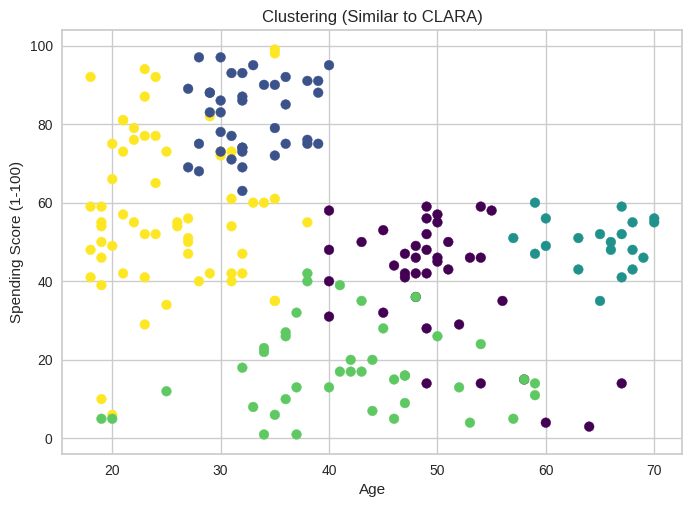

In [31]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Sample a subset of the data (adjust sample size as needed)
sample_size = 100 # Changed sample size to be smaller than the dataset
data_sample = data.sample(sample_size)

# Scale the sample data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_sample)

# Define the number of clusters
n_clusters = 5

# Create the Mini-Batch KMeans model and fit it to the data
model = MiniBatchKMeans(n_clusters=n_clusters, batch_size=256)  # Adjust batch size as needed
model.fit(scaled_data)

# Assign cluster labels back to the original DataFrame
data['cluster_CLARA'] = model.predict(scaler.transform(data))

# Visualize the clusters
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['cluster_CLARA'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering (Similar to CLARA)')
plt.show()

<a id = "11"></a><br>
# **5 - DIANA**

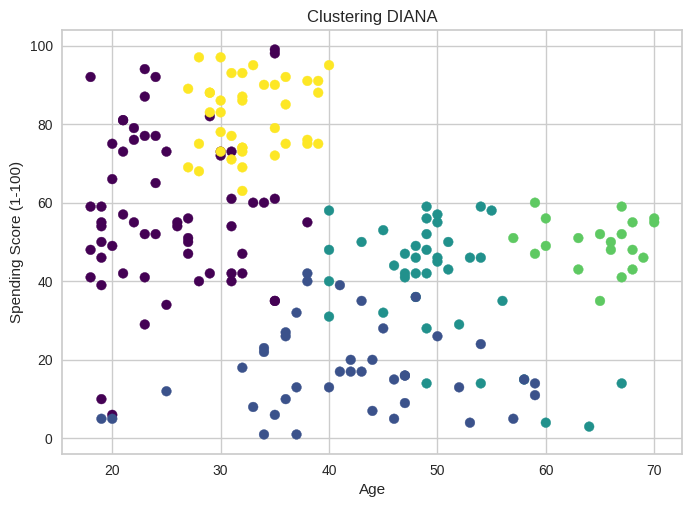

In [32]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define the number of clusters (adjust as needed)
n_clusters = 5

# Create the DIANA model and fit it to the data (using linkage='complete')
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
model.fit(scaled_data)

# Add cluster labels to the DataFrame
data['cluster_DIANA'] = model.labels_

# Visualize the clusters
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['cluster_DIANA'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering DIANA')
plt.show()

<a id = "12"></a><br>
# **6 - DBSCAN**

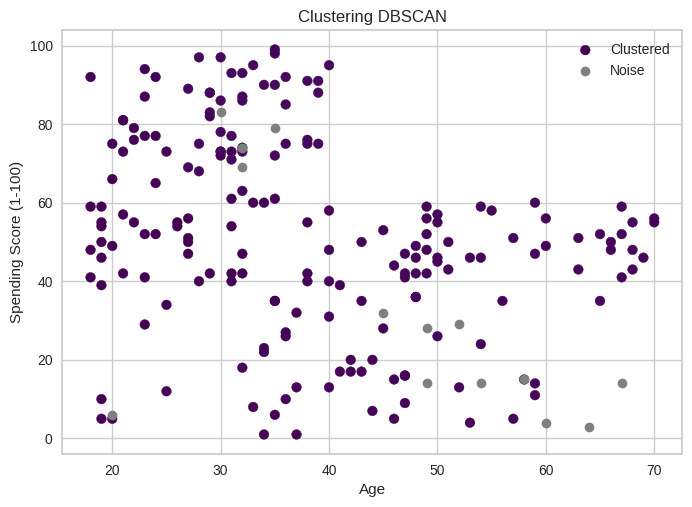

In [33]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Scale the data (optional but recommended, especially for DBSCAN)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define parameters for DBSCAN (adjust eps and min_samples as needed)
eps = 0.5  # Maximum distance between points to be considered core samples
min_samples = 10  # Minimum number of points within eps to be considered a cluster

# Create the DBSCAN model and fit it to the data
model = DBSCAN(eps=eps, min_samples=min_samples)
model.fit(scaled_data)

# Extract cluster labels (including noise points labeled -1)
data['cluster_DBSCAN'] = model.labels_

# Visualize the clusters (separating noise points)
core_samples_mask = np.zeros_like(data['cluster_DBSCAN'], dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
cluster_colors = plt.cm.viridis(model.labels_)

# Plot core samples and noise points with different colors
plt.scatter(data[core_samples_mask]['Age'],
            data[core_samples_mask]['Spending Score (1-100)'],
            c=cluster_colors[core_samples_mask], label='Clustered')
plt.scatter(data[~core_samples_mask]['Age'],
            data[~core_samples_mask]['Spending Score (1-100)'],
            c='gray', marker='o', linewidths=0, label='Noise')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering DBSCAN')
plt.legend()
plt.show()